In [1]:
!pip install catboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_validate, learning_curve, RandomizedSearchCV,GridSearchCV, StratifiedKFold, cross_val_score, cross_val_predict,KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=FutureWarning)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:

train = pd.read_csv('/content/Train_new (2).csv')
test = pd.read_csv('/content/Test_new (2).csv')
submission = pd.read_csv('/content/SampleSubmission (1).csv')

In [4]:
train.shape, test.shape, submission.shape

((4809, 72), (1601, 72), (1601, 2))

In [5]:
train.head()


,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,night_mainland,...,package_insurance_1,payment_mode_2,first_trip_tz_1,f_min,f_max,f_mean,f_sd,f_median,f_sum,f_skew
0,tour_0,101,2,3,1.0,1.0,1,1,3,13.0,...,0,0,0,0.0,674602.5,10959.719275,84276.346811,1.0,7.014220e+05,7.998753
1,tour_10,111,1,1,1.0,0.0,1,4,4,14.0,...,0,0,1,0.0,3214906.5,50582.626646,401819.628395,1.0,3.237288e+06,7.999955
2,tour_1000,111,1,1,0.0,1.0,5,4,3,1.0,...,0,0,0,-10.0,3315000.0,52153.979709,414330.359872,1.0,3.337855e+06,7.999958
3,tour_1002,111,1,2,1.0,1.0,1,1,1,11.0,...,0,0,1,0.0,7790250.0,122184.673175,973722.990428,1.0,7.819819e+06,7.999990
4,tour_1004,17,0,1,1.0,0.0,1,1,1,7.0,...,0,0,1,0.0,1657500.0,26255.386450,207143.546683,1.0,1.680345e+06,7.999836


In [6]:
test.head()


,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,night_mainland,...,package_insurance_1,payment_mode_2,first_trip_tz_1,f_min,f_max,f_mean,f_sd,f_median,f_sum,f_skew
0,tour_1,3,2,2,1.0,1.0,1,1,1,10.0,...,1,0,1,0.0,2966.0,360.151961,754.802519,1.5,23049.725515,2.155384
1,tour_100,95,1,3,0.0,3.0,0,1,6,13.0,...,0,0,0,-3.0,3023.0,247.628353,625.391902,1.0,15848.214598,3.062716
2,tour_1001,35,1,3,3.0,0.0,1,2,3,7.0,...,0,0,0,-4.0,2840.0,228.156195,592.279349,1.0,14601.996465,3.114190
3,tour_1006,14,0,3,2.0,0.0,1,4,4,0.0,...,0,0,1,-4.0,2840.0,205.808218,505.912885,1.0,13171.725931,3.390294
4,tour_1009,111,2,3,2.0,2.0,1,1,3,10.0,...,0,0,1,0.0,3023.0,324.472311,725.909433,2.0,20766.227906,2.408818


In [7]:
submission.head()

,ID,total_cost
0,tour_1,0
1,tour_100,0
2,tour_1001,0
3,tour_1006,0
4,tour_1009,0


In [8]:
# dropping the  Id in the train  and test data
train = train.drop('ID', axis=1)
test = test.drop(['ID','total_cost'], axis=1)

## Target variable

### Correlation

In [9]:
#negative
train.corr()['total_cost'].sort_values()[train.corr()['total_cost'].sort_values() < 0]

,total_cost
total_people_freq,-0.389835
total_people_count,-0.389835
travel_with_count,-0.369029
travel_with_freq,-0.369029
tour_total_nights_freq,-0.353878
tour_total_people_freq,-0.353878
tour_total_nights_count,-0.353878
tour_total_people_count,-0.353878
info_source,-0.260953
night_zanzibar_count,-0.195072


In [10]:
#positive
train.corr()['total_cost'].sort_values()[train.corr()['total_cost'].sort_values() > 0]

,total_cost
night_mainland,0.054968
payment_mode_2,0.100867
total_nights,0.125124
diff_male_female,0.128645
f_skew,0.158569
sum_nights_people,0.177477
country_group,0.183253
night_zanzibar,0.184906
info_source_freq,0.186201
info_source_count,0.186201


In [11]:
#dropping columns with more than 90% correlation
train= train.drop(['f_max','f_sd','f_mean','f_sum'],axis=1)

In [12]:
train['total_cost'].value_counts()

,count
total_cost,
1657500.0,154
3315000.0,109
828750.0,88
497250.0,76
331500.0,76
...,...
240337.5,1
2361937.5,1
425000.0,1


<Axes: xlabel='total_cost', ylabel='Density'>

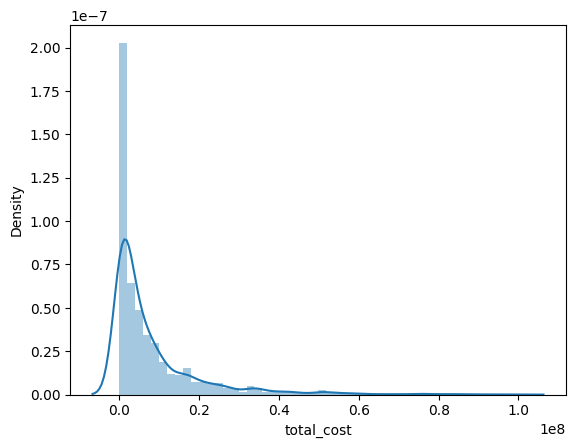

In [13]:
sns.distplot(train['total_cost'],kde=True)

- Positive Skewness: The tail on the right side is longer, so most data points are concentrated on the left. This means there are some high values (outliers) stretching the data to the right.We will perform some  transformation on the column to compress high values.

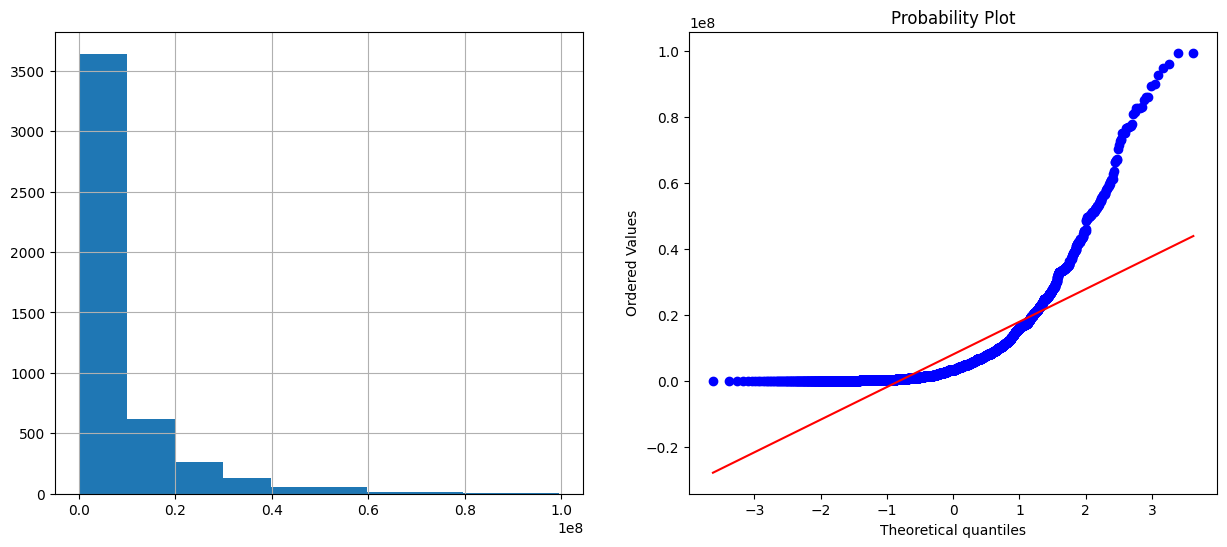

In [14]:
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats # import the stats module from scipy

def diagnostic_plots(train, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    train[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(train[variable], dist="norm", plot=pylab) # Use stats.probplot

    plt.show()

diagnostic_plots(train, 'total_cost')

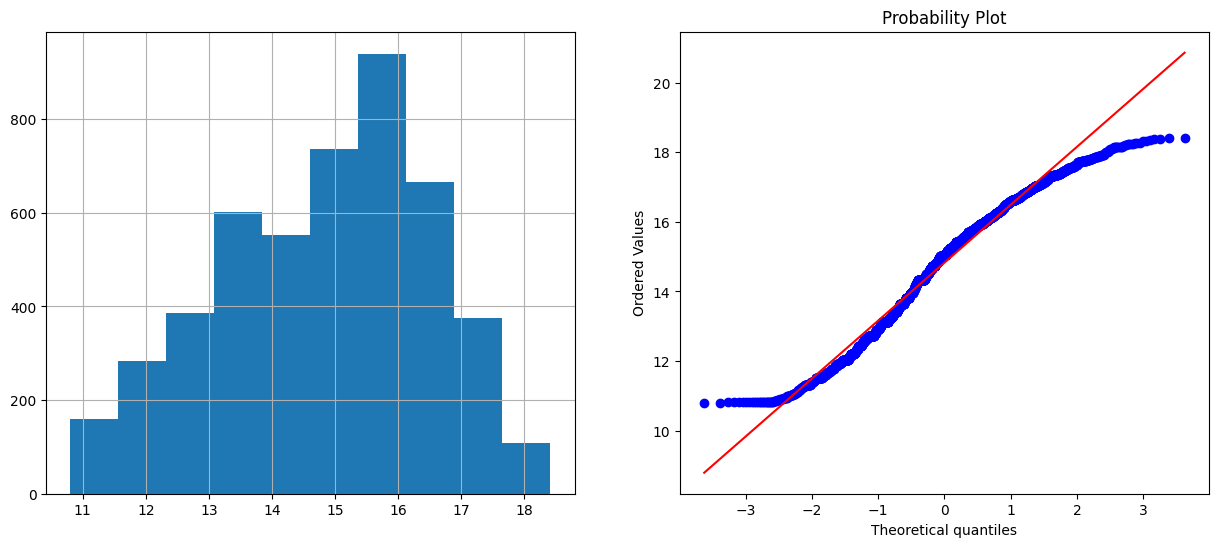

In [15]:
### Logarithmic transformation
train['total_cost_log'] = np.log(train.total_cost)

diagnostic_plots(train, 'total_cost_log')

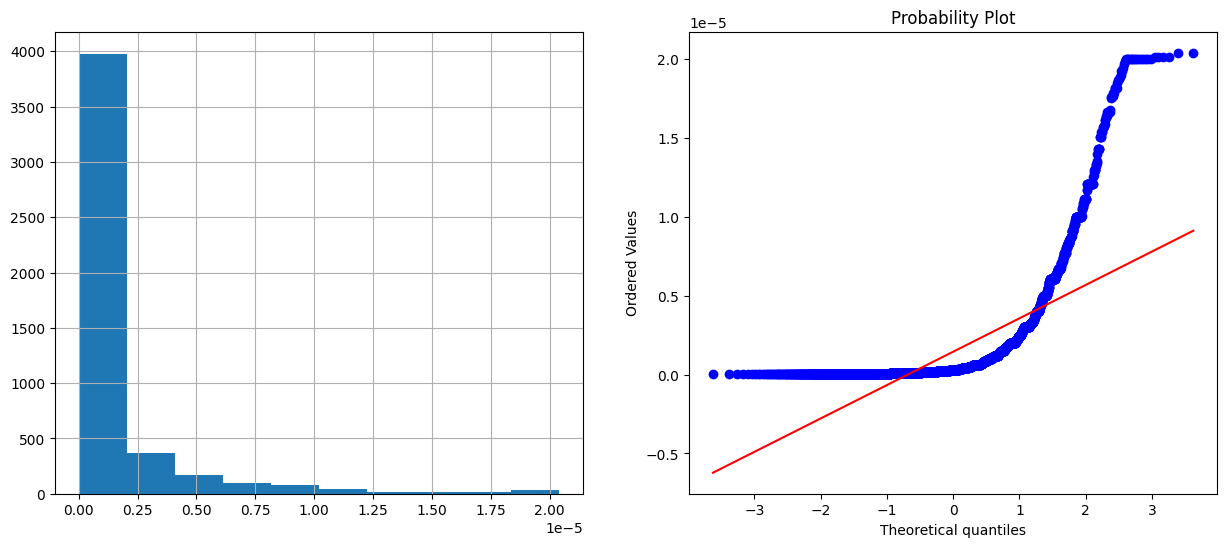

In [16]:
### Reciprocal transformation
train['total_cost_reciprocal'] = 1 / train.total_cost

diagnostic_plots(train, 'total_cost_reciprocal')

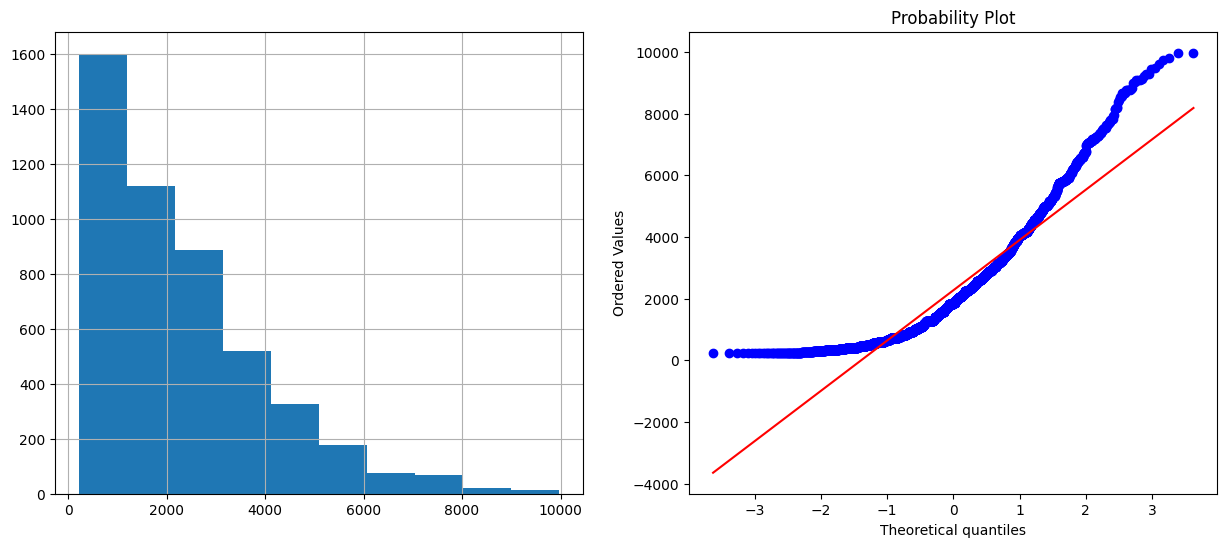

In [17]:
### square root transformation
train['total_cost_sqrt'] = train.total_cost**(1/2)

diagnostic_plots(train, 'total_cost_sqrt')

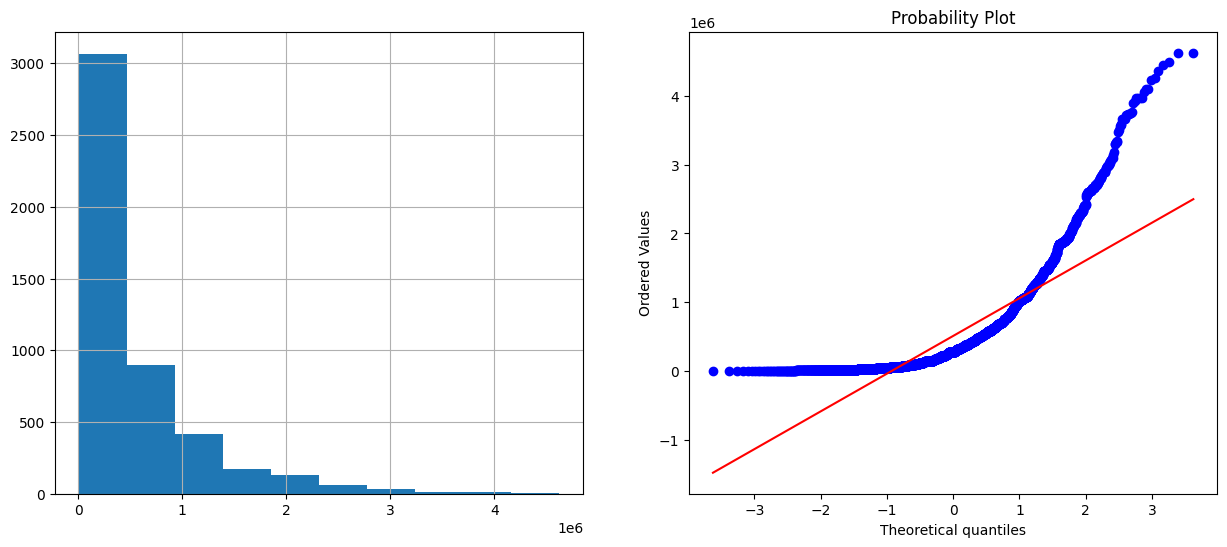

In [18]:
###exponential transformation
train['total_cost_exp'] = train.total_cost**(1/1.2)

diagnostic_plots(train, 'total_cost_exp')

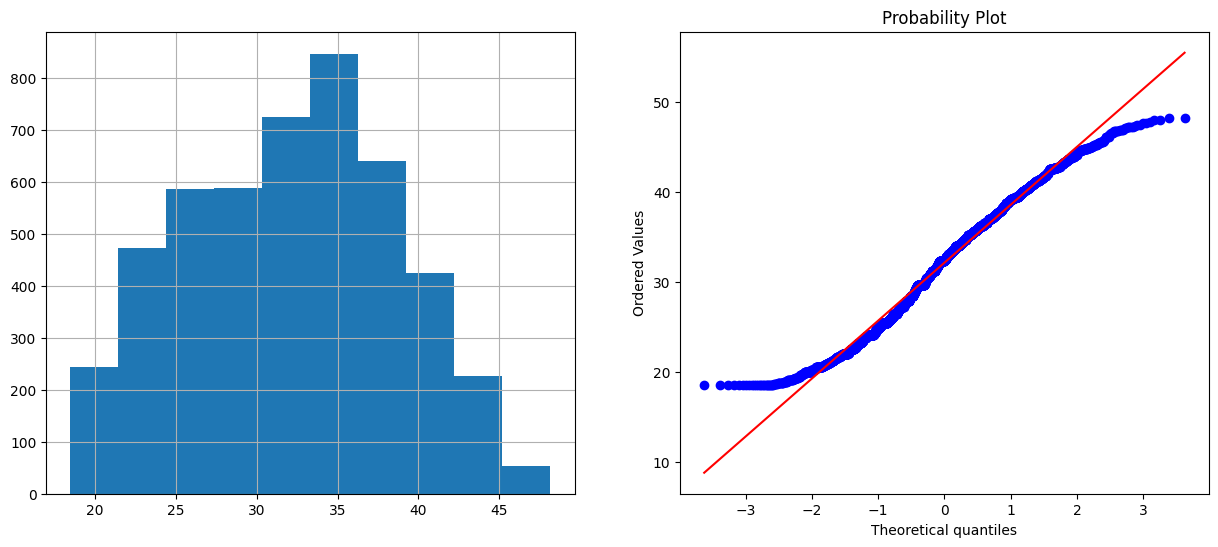

In [19]:
###Boxcox transformation
train['total_cost_boxcox'], lmbda = stats.boxcox(train.total_cost)

diagnostic_plots(train, 'total_cost_boxcox')


- From the above graphs we can see that boxcox and log transformation perfomed really well but here  we will go with the boxcox transformation.

In [20]:
#creating a box-cox transformation and reverse function

class BoxCoxTransformer:
    def __init__(self, lambda_):
        # Initialize with the lambda value used for Box-Cox transformation
        self.lambda_ = lambda_

    # Box-Cox transformation function
    def boxcox_transform(self, y):
        if self.lambda_ == 0:
            return np.log(y)
        return (y**self.lambda_ - 1) / self.lambda_

    # Reverse Box-Cox transformation function
    def reverse_boxcox(self, y):
        if self.lambda_ == 0:
            return np.exp(y)
        return (self.lambda_ * y + 1) ** (1 / self.lambda_)



In [21]:
#dropping the  transformations
train = train.drop(['total_cost_boxcox','total_cost_log','total_cost_reciprocal','total_cost_sqrt','total_cost_exp'],axis=1)

In [22]:
#box-cox transforming the target variable
lambda_ = 0
# Create an instance of BoxCoxTransformer
transformer = BoxCoxTransformer(lambda_)

train['total_cost'] = transformer.boxcox_transform(train['total_cost'])

# Model building

In [23]:
#removing spaces in the column names
train.columns = train.columns.str.replace(' ', '_')
test.columns = test.columns.str.replace(' ', '_')

In [24]:
X = train.drop('total_cost',axis=1)
y = train['total_cost']
print(X.shape)
print(y.shape)

(4809, 66)
(4809,)


In [25]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

**Trying with some few models**

In [26]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Catboost": CatBoostRegressor(verbose=0),
    "Random Forest": RandomForestRegressor(),
    "Lgbm": lgb.LGBMRegressor(verbose=0)
}

# Set up cross-validation strategy
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Iterate through each model
for name, model in models.items():
    print(f"Evaluating {name}...\n")

    # Calculate cross-validated scores for each metric
    neg_mae = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    neg_rmse = cross_val_score(model, X, y, cv=kfold, scoring='neg_root_mean_squared_error')
    r2 = cross_val_score(model, X, y, cv=kfold, scoring='r2')

    # Convert negative scores to positive
    mae = -neg_mae.mean()
    rmse = -neg_rmse.mean()
    r2_mean = r2.mean()

    print("Model performance (Cross-Validation):")
    print(f"- Mean Absolute Error (MAE): {mae:.4f}")
    print(f"- Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"- R2 Score: {r2_mean:.4f}")
    print("=" * 35)
    print("\n")


Evaluating LinearRegression...

Model performance (Cross-Validation):
- Mean Absolute Error (MAE): 0.7832
- Root Mean Squared Error (RMSE): 1.0297
- R2 Score: 0.6244


Evaluating Ridge...

Model performance (Cross-Validation):
- Mean Absolute Error (MAE): 0.7972
- Root Mean Squared Error (RMSE): 1.0483
- R2 Score: 0.6106


Evaluating Catboost...

Model performance (Cross-Validation):
- Mean Absolute Error (MAE): 0.0540
- Root Mean Squared Error (RMSE): 0.1122
- R2 Score: 0.9955


Evaluating Random Forest...

Model performance (Cross-Validation):
- Mean Absolute Error (MAE): 0.0559
- Root Mean Squared Error (RMSE): 0.0870
- R2 Score: 0.9973


Evaluating Lgbm...

Model performance (Cross-Validation):
- Mean Absolute Error (MAE): 0.0268
- Root Mean Squared Error (RMSE): 0.0388
- R2 Score: 0.9995




- We can see that the linear models performed poorly indicating that there is no linear relationship between the independent features and the target variable.
- lgbm performed very well  with a lower MAE compared  to the other models so we will select it

In [27]:
#fitting the model
best_params = {
    'learning_rate': 0.05,
    'n_estimators': 1000,
    'num_leaves': 31,
    'random_state': 42,
    'objective': 'regression',
    'metric': 'mae'
}

# Initialize the model with the best hyperparameters
final_model = lgb.LGBMRegressor(**best_params)

# Fit the model on the entire training dataset
final_model.fit(X, y)




LGBMRegressor(learning_rate=0.05, metric='mae', n_estimators=1000,
              objective='regression', random_state=42)

In [28]:
test = test.drop(['f_max','f_sd','f_mean','f_sum'],axis=1)

In [29]:
test_pred = final_model.predict(test)

In [30]:
lambda_ = 0  # Using the same lambda value as before
transformer = BoxCoxTransformer(lambda_)

test_pred = transformer.reverse_boxcox(test_pred)

In [31]:
submission['total_cost'] = test_pred

In [32]:
submission.head()

,ID,total_cost
0,tour_1,51935.949366
1,tour_100,45444.729044
2,tour_1001,46135.215966
3,tour_1006,45193.617413
4,tour_1009,53720.844237


In [33]:
submission.to_csv('submission_final', index=False)

In [34]:
feature_importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': final_model.feature_importances_
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

Text(0, 0.5, 'Attribute')

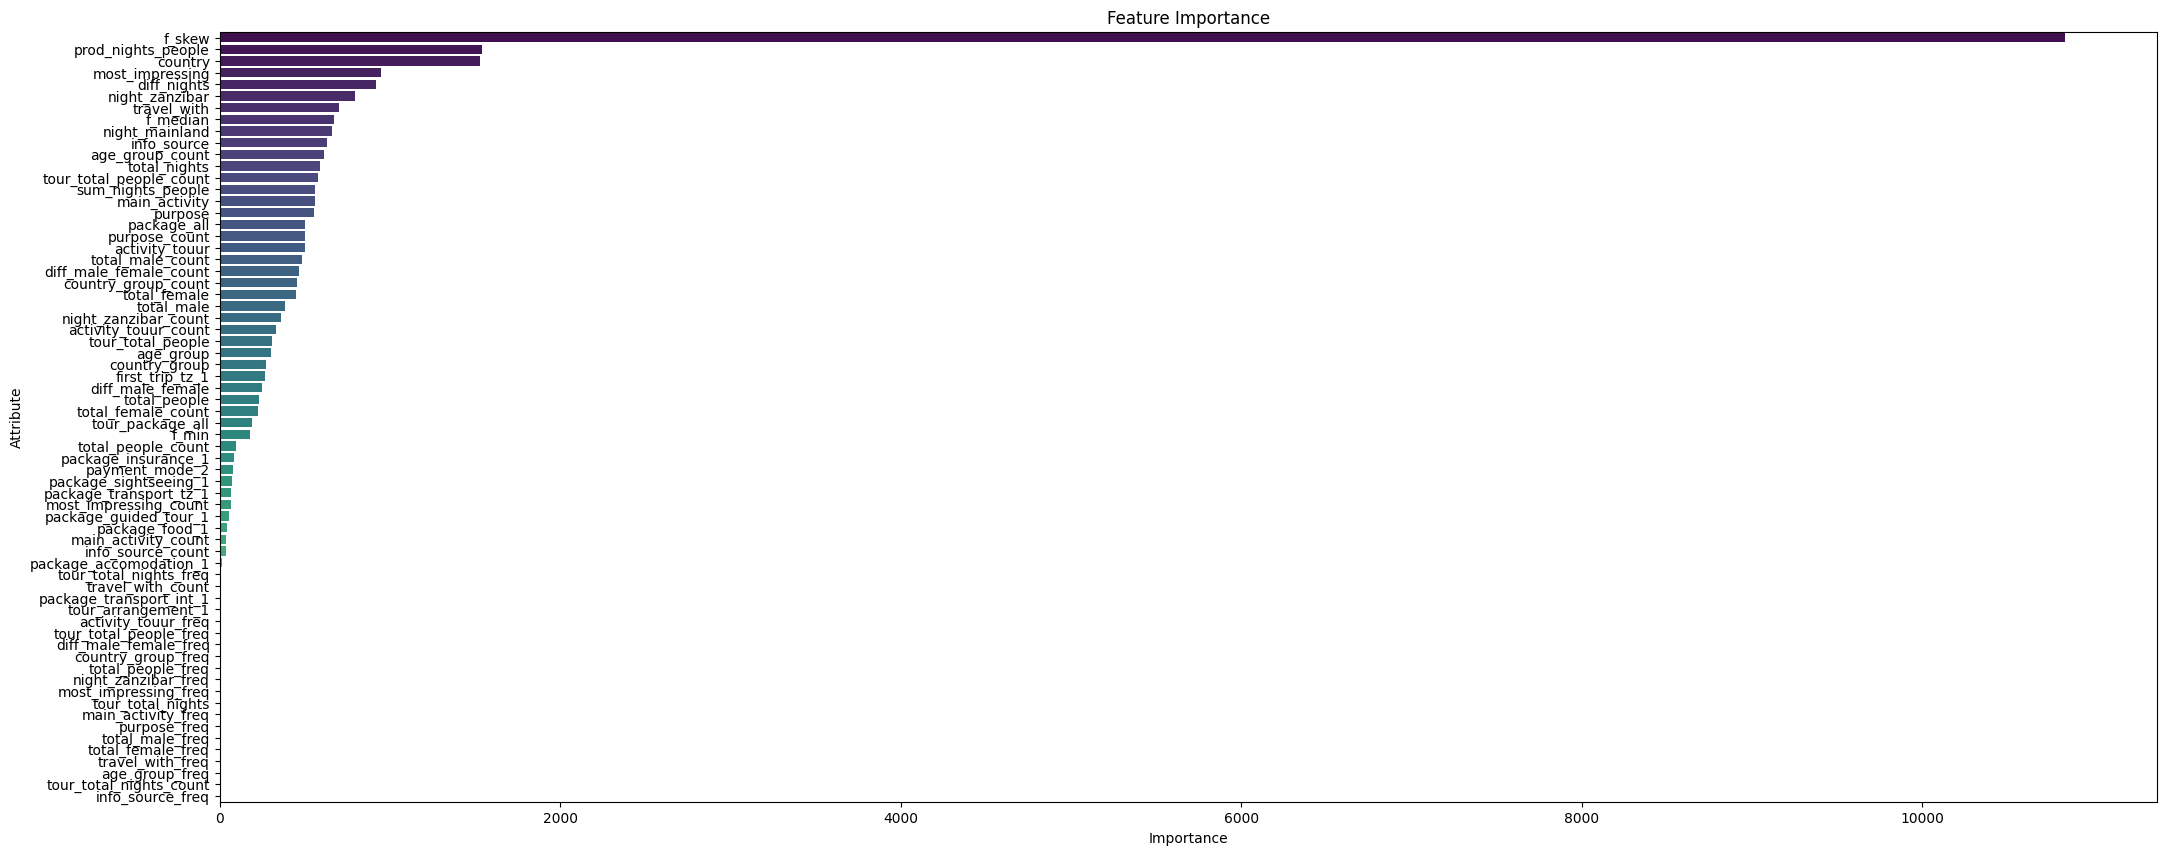

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Attribute', data=feature_importances, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.tight_layout
plt.ylabel('Attribute')